In [78]:
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
import random
import copy
import functools
import decimal
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer
decimal.getcontext().prec = 64

In [185]:
def generate_uniform_points(a=(0, 0), b=(100, 0), c=(100, 100), d=(0, 100), n=100, prec = 1):
    random.seed()
    points = set()
    for i in range(n):
        while True:
            x = round(random.uniform(a[0],b[0]), prec)
            y = round(random.uniform(a[1],d[1]), prec)
            new_point = (x,y)
            if new_point not in points:
                points.add(new_point)
                break
    return list(points)


def even_circle_points(O, R, n, prec = 1):
    points=[]
    step = 1/n
    for i in range (n):
        t = step * i
        x = round(R*np.cos(t*np.pi*2) + O[0], prec)
        y = round(R*np.sin(t*np.pi*2) + O[1], prec)
        points.append((x,y))
    return points


def set_convex_hull(inside = 15, outside = 5, size_of_square = 20, O=(0,0), prec = 2):
    a = [-size_of_square/2+O[0], -size_of_square/2+O[1]]
    b = [size_of_square/2+O[0], -size_of_square/2+O[1]]
    c = [size_of_square/2+O[0], size_of_square/2+O[1]]
    d = [-size_of_square/2+O[0], size_of_square/2+O[1]]
    new_points=generate_uniform_points(a,b,c,d, inside, prec)
    new_points.extend(even_circle_points(O, size_of_square*1.5, outside, prec))
    new_points=random.sample(new_points,len(new_points))
    return new_points


def generate_rectangle_points(a=(-10, -10), b=(10, -10), c=(10, 10), d=(-10, 10), n=10**3):
    random.seed()
    points = set()
    edge = c[0]-a[0]
    for i in range (n):
        while True:
            dist=random.uniform(0,edge*4)
            if dist<edge:
                x=a[0]
                y=dist+a[1]
            elif dist<edge*2:
                x=dist-edge+d[0]
                y=d[1]
            elif dist<edge*3:
                x=b[0]
                y=dist-(edge*2)+b[1]
            else:
                x=dist-(edge*3)+a[0]
                y=a[1]
            new_point = (x,y)
            if new_point not in points:
                points.add(new_point)
                break
    return list(points)


In [186]:
def Start_point (Q):
    start=Q[0]
    start_idx=0
    for i in range (1,len(Q)):
        if Q[i][1]<start[1]:
            start=Q[i]
            start_idx=i
        elif Q[i][1]==start[1]:
            if Q[i][0]<start[0]:
                start=Q[i]
                start_idx=i
    return start,start_idx


def orientation (a,b,c,epsilon):
    if epsilon < 1e-10:
        # Występuje tu zamiana typu danych na dokładność do 64 liczb miejsc po przecinku
        a=(decimal.Decimal(a[0]),decimal.Decimal(a[1]))
        b=(decimal.Decimal(b[0]),decimal.Decimal(b[1]))
        c=(decimal.Decimal(c[0]),decimal.Decimal(c[1]))
    det=(b[0]-a[0])*(c[1]-b[1])-(b[1]-a[1])*(c[0]-b[0])
    if abs(det)<epsilon:
        return 0
    elif det>0:
        return 1
    else:
        return -1


def further (a,b,c):
    if a[0]==b[0]:
        if abs(a[1]-b[1])>abs(a[1]-c[1]):
            return True
        else:
            return False
    else:
        if abs(a[0]-b[0])>abs(a[0]-c[0]):
            return True
        else:
            return False


def ComparePoints(start_point, first, second, epsilon):
    orient=orientation(start_point, first, second, epsilon)
    if orient>0 or (orient==0 and further(start_point, first, second)==False):
        return -1
    else:
        return 1
    

def Sort_points (Q,start,start_idx,epsilon):
    if len(Q)==1: return Q
    start_point = Q[start_idx]
    Q.pop(start_idx)    
    Q = sorted(Q, key = functools.cmp_to_key(lambda first, second: ComparePoints(start_point, first, second, epsilon)))
    Q_sorted=[start_point]
    for i in range (len(Q)-1):
        if orientation(start_point,Q[i],Q[i+1], epsilon)!=0:
            Q_sorted.append(Q[i])
    Q_sorted.append(Q[len(Q)-1])
    return Q_sorted


def Get_convex_hull(Q,epsilon):
    convex_hull=[Q[0],Q[1],Q[2]]
    i=3
    t=2
    while i<len(Q):
        if orientation(convex_hull[t-1],convex_hull[t],Q[i],epsilon)>0:
            convex_hull.append(Q[i])
            t+=1
            i+=1
        else:
            convex_hull.pop()
            t-=1
    return convex_hull



def graham_algorithm(Q, epsilon = 1e-25, clockwise = False):
    points = copy.deepcopy(Q)
    start,start_idx=Start_point(points)
    points=Sort_points(points,start,start_idx,epsilon)
    if len(points)<3:
        convex_hull = points
    else:
        convex_hull = Get_convex_hull(points,epsilon)
    if clockwise == True:
        convex_hull.reverse()
    return convex_hull

In [187]:
def jarvis_algorithm(Q, steps = False):
    global count

    def orientation(p1, p2, p3):
        x1, y1, x2, y2, x3, y3 = *p1, *p2, *p3
        d = (y3-y2)*(x2-x1) - (y2-y1)*(x3-x2)
        if d > 0:
            return 1
        elif d < 0:
            return -1
        else:
            return 0
      

    def dist(p1, p2):
        x1, y1, x2, y2 = *p1, *p2
        return (y2-y1)**2 + (x2-x1)**2
  
    x_min, y_min = float('inf'), float('inf')
    for i in range(len(Q)):
        x, y = Q[i]
        y_min = min(y_min, y)
    hull = []    
    
    for i in range(len(Q)):
        x, y = Q[i]
        if(y == y_min):
            x_min = min(x_min, x)
        
    on_hull = (x_min, y_min)
    while True:
        count += 1
        hull.append(on_hull)
        if(steps):
            new_vis = draw_from_arr(hull, Q)
            new_vis.show()
        next_point = Q[0]
        for point in Q:
            count += 1
            o = orientation(on_hull, next_point, point)
            if next_point == on_hull or o == -1 or (o == 0 and dist(on_hull, point) > dist(on_hull, next_point)):
                next_point = point
        on_hull = next_point
        if on_hull == hull[0]:
            break
    return hull
    raise Exception("Unimplemented")
    
def add_perimeter(points, vis, col = "red"):
    n = len(points)
    for i in range(n-1):
        vis.add_line_segment([(points[i], points[i+1])], color = col)
    vis.add_line_segment([(points[-1], points[0])], color = col)

In [194]:
global colors
colors = ["red", "green", "orange", "brown", "grey", "pink", "black", "blue", "lime", "cyan", "gold", "magenta"]


def Chan_algorithm(Q):
    n = len(Q)
    t = 4
    
    
    def dist(p1, p2):
        x1, y1, x2, y2 = *p1, *p2
        return (y2-y1)**2 + (x2-x1)**2
    
    def orientation(p1, p2, p3):
        x1, y1, x2, y2, x3, y3 = *p1, *p2, *p3
        d = (y3-y2)*(x2-x1) - (y2-y1)*(x3-x2)
        if d > 0:
            return 1
        elif d < 0:
            return -1
        else:
            return 0
        
    def check(p1, convex):
        if(orientation(p1, convex[0], convex[-1]) > 0):
            flag = True
        if(orientation(p1, convex[0], convex[1]) > 0):
            if(flag):
                return float('inf'), float('inf')
            return 1, n//2
        else:
            if(flag):
                return n//2, n-1
            return 1, 
    
    def bin_search(p1, convex):
        n = len(convex)
        wrong = False
        l, r = check(p1, convex)
        if(l == float('inf')):
            return convex[0]
        if(l == -1):
            if(orientation(p1, convex[1], convex[0]) > 0):
                flag = True
            if(orientation(p1, convex[1], convex[2]) > 0):
                if(flag):
                    return convex[1]
                else:
                    l, r = 2, (n+1)//2
        else:
            l, r = n//2, n-1
                
    
    def max_angle(p2, p1, points):
        test, n = points[0], len(points)
        for i in range(1, n, 1):
            orient = orientation(p1, test, points[i])
            if(orient < 0 or ( orient == 0 and dist(p1, test) < dist(p1, points[i]) ) ):
                test = points[i]
        return test
    
    
    def min_point(p1, p2):
        if(p1[1] < p2[1] or (p1[1] == p2[1] and p1[0] <= p2[0] )):
            return p1
        return p2
        
        
    def find_bottom(Q):
        INF = float('inf')
        min_p = (INF, INF)
        n = len(Q)
        for i in range(n):
            min_p = min_point(min_p, Q[i])
        return min_p
    
    
    def chan(points, m):
        global colors
        vis2, vis3 = Visualizer(), Visualizer()
        k, start = n//m + (n % m != 0), 0
        angles, col = [0] * k, 0
        INF = -40
        P, convex = [], [(INF, 0)]
        convex.append(find_bottom(points))
        vis2.add_point(points, color = "blue")
        #vis2.show()
        for i in range(k):
            P.append(Q[start:(min(start+m, n))])
            start += m
            vis2.add_point(P[i], color = colors[i%12])

            
        #vis2.show()
        for i in range(k):
            P[i] = graham_algorithm(P[i]) 
            add_perimeter(P[i], vis2, colors[i%12])
        
        #vis2.show()
        
        for i in range(m):
            for j in range(k):
                angles[j] = max_angle(convex[-2], convex[-1], P[j])
                
            max_point = max_angle(convex[-2], convex[-1], angles)
            if(max_point == convex[1]):
                print("ZNALEZIONE")
                vis3.add_point(points, color = "blue")
                vis3.add_point(convex[1:], color = "red")
                add_perimeter(convex[1:], vis3, "red")
                vis3.show()
                return True, convex
            convex.append(max_point)
            
        return False, []
    
    
    def run(Q):
        t, n = 2, len(Q)
        while(True):
            t = min(n, t)
            print(t)
            x, y = chan(Q, t)
            if(x):
                return y
            if(t >= n):
                break
            t *= t
            
    #res = chan(Q, 120)
    wyn = run(Q)    
    return wyn
    

2
4
16
256
1890
ZNALEZIONE


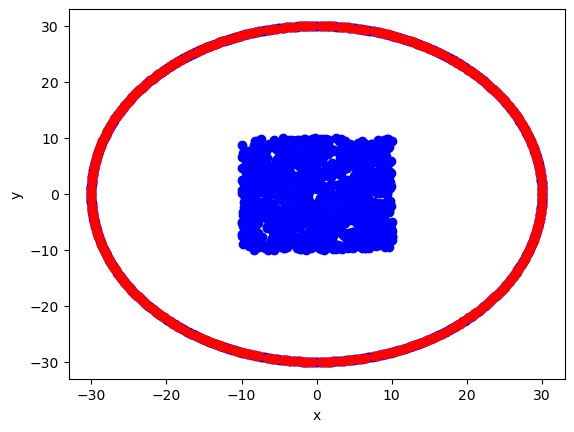

In [195]:
X = set_convex_hull(inside = 1000 , outside = 890)
dupsko = Chan_algorithm(X)